# Comparison of Scipy Integration Functions

In [15]:
from functools import partial
import numpy as np
import scipy
from scipy.integrate import odeint, solve_ivp
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
from platform import python_version
print(f"Python: {python_version()}")
print(f"Scipy: {scipy.__version__}")

Python: 3.6.7
Scipy: 1.4.1


In [4]:
def lorenz_odes(t, y, sigma, beta, rho):
    """The Lorenz system of ordinary differential equations.

    Returns:
        dydt (tuple): Derivative (w.r.t. time)
    """
    y1, y2, y3 = y
    return (sigma * (y2 - y1), y1 * (rho - y3) - y2, y1 * y2 - beta * y3)


In [5]:
dt = 0.01
T = 50
t = np.arange(dt, T + dt, dt)

# Lorenz system parameters
beta = 8 / 3
sigma = 10
rho = 28
n = 3

# Function to be integrated - with parameter values
fun = partial(lorenz_odes, sigma=sigma, beta=beta, rho=rho)

# Initial condition
y0 = (-8, 8, 27)

In [7]:
# Simulate using scipy.integrate.odeint method
# Produces same results as Matlab
rtol = 10e-12
atol = 10e-12 * np.ones_like(y0)
y = odeint(fun, y0, t, tfirst=True, rtol=rtol, atol=atol)
assert y.shape == (5000, 3)

In [10]:
# Simulate using scipy.integrate.solve_ivp method
t_span = [t[0], t[-1]]
sol = solve_ivp(fun, t_span, y0, t_eval=t, method='LSODA')
assert sol.t.shape == t.shape
assert sol.y.swapaxes(0, 1).shape == y.shape

In [13]:
# Compare solutions
print(f"Max difference: {np.max(y - sol.y.swapaxes(0, 1)):.3f}")

Max difference: 38.099


## Speed tests

In [11]:
%timeit y = odeint(fun, y0, t, tfirst=True, rtol=rtol, atol=atol)

89.9 ms ± 464 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [12]:
%timeit sol = solve_ivp(fun, t_span, y0, t_eval=t, method='LSODA')

217 ms ± 2.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


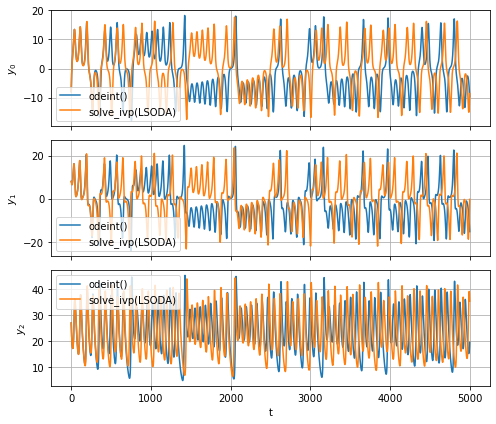

In [17]:
fig, axes = plt.subplots(3, 1, sharex=True, figsize=(7,6))
for i, ax in enumerate(axes):
    ax.plot(y[:, i], label='odeint()')
    ax.plot(sol.y.swapaxes(0, 1)[:, i], label='solve_ivp(LSODA)')
    ax.set_ylabel('$y_{%d}$' % i)
    ax.grid()
    ax.legend()
ax.set_xlabel('t')
plt.tight_layout()
plt.show()